Import libraries. 
If you do not have a library installed use this tutorial: https://packaging.python.org/en/latest/tutorials/installing-packages/ to install them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use this cell to personalize file names and locations

In [ ]:
data_file_location = 'Data/all_normalized_data.tsv'
fig_1_destination = 'Figures/'
fig_1_file_name = 'Figure_1.jpg'

Import data and calculate the sorting order based on percent 80th percentile or above

In [ ]:
data = pd.read_csv(data_file_location, sep='\t', index_col=0)

# Calculate median values for each cancer type
median_hotness = data.groupby("project_id")["hot_tumor"].median()
median_exosome = data.groupby("project_id")["exosome"].median()
median_total = data.groupby('project_id')['overall_score'].median()

# Compute 80th percentile threshold
percentile_80_hotness = median_hotness.quantile(0.8)
percentile_80_exosome = median_exosome.quantile(0.8)
percentile_80_total = median_total.quantile(0.8)

# Sort cancer types by median total score to get top 5
median_total_sorted = median_total.sort_values(ascending=True)
top_cancer_types = median_total_sorted[median_total_sorted > percentile_80_total]

Create plot

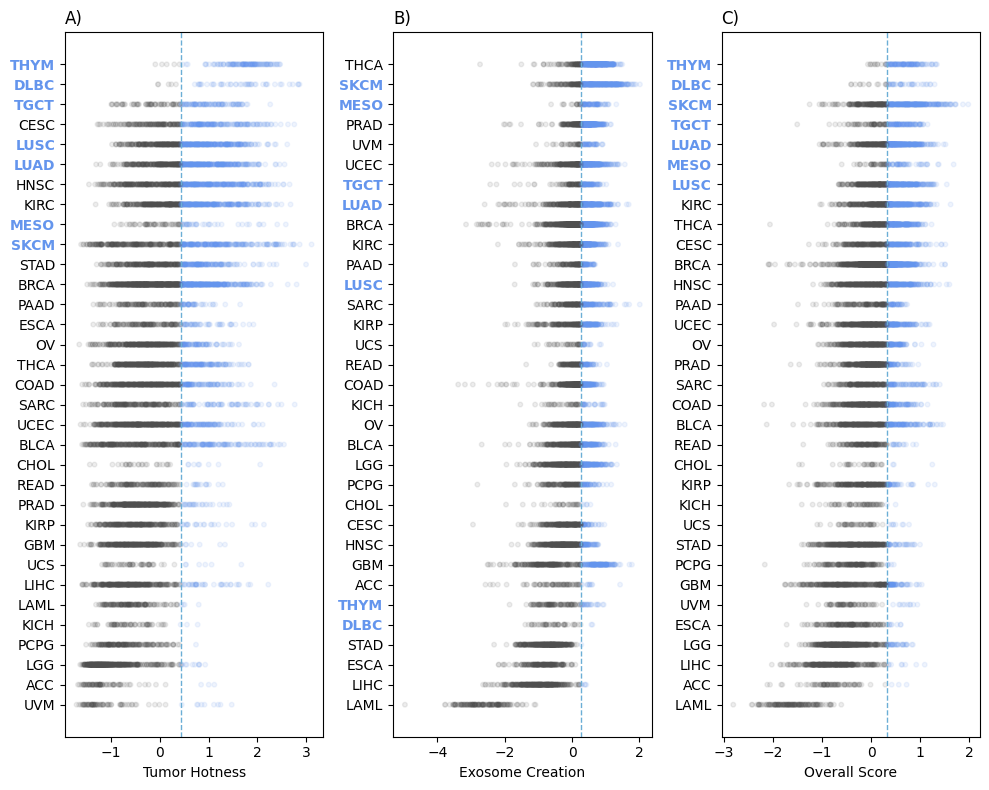

In [ ]:
# Function to highlight the same top 5 cancer types across all plots
def highlight_labels(ax):
    labels = ax.get_yticklabels()
    for label in labels:
        if label.get_text() in top_cancer_types:
            label.set_color('cornflowerblue')
            label.set_fontweight('bold')

# Create the figure with 4 subplots
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(10, 8))

# Function to plot scatter plots
def plot_scatter(ax, data_col, median_values, percentile_80, xlabel):
    # Sort by median values for individual plot
    sorted_cancer_types = median_values.sort_values(ascending=True).index
    data_sorted = data.set_index("project_id").loc[sorted_cancer_types]
    
    # Highlight points 80th percentile and above
    data_sorted["color"] = np.where(data_sorted[data_col] >= percentile_80, "cornflowerblue", "#4f4f4f")
    # plot points and 80th percentile line
    ax.scatter(data_sorted[data_col], data_sorted.index, c=data_sorted["color"], s=11, alpha=0.1)
    ax.axvline(x=percentile_80, color="#6baed6", linestyle="--", linewidth=1, label="80th Percentile")
    ax.set_xlabel(xlabel)
    ax.set_yticks(range(len(sorted_cancer_types)))
    ax.set_yticklabels(sorted_cancer_types)
    highlight_labels(ax)

plot_scatter(axes[0], "hot_tumor", median_hotness, percentile_80_hotness, "Tumor Hotness")
axes[0].set_title("A)", loc='left')

plot_scatter(axes[1], "exosome", median_exosome, percentile_80_exosome, "Exosome Creation")
axes[1].set_title("B)", loc='left')

plot_scatter(axes[2], "overall_score", median_total, percentile_80_total, "Overall Score")
axes[2].set_title("C)", loc='left')

# Adjust layout
plt.tight_layout()
plt.savefig(fig_1_destination + fig_1_file_name)
plt.show()